In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

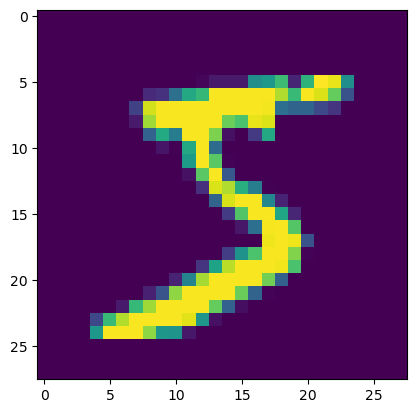

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9186 - val_loss: 0.1314 - val_accuracy: 0.9609
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1145 - accuracy: 0.9662 - val_loss: 0.1107 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.0992 - val_accuracy: 0.9708
Epoch 4/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0962 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0944 - val_accuracy: 0.9730
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.1117 - val_accuracy: 0.9694
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0937 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 878us/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.973

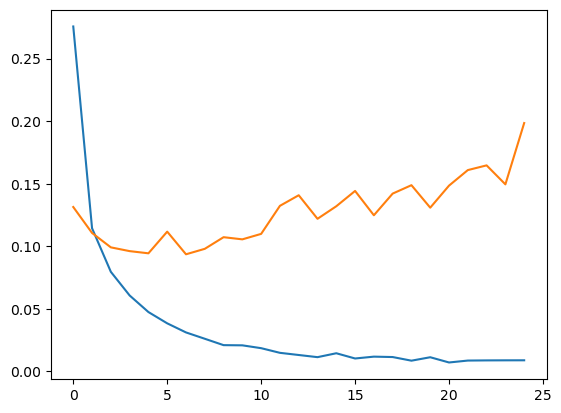

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

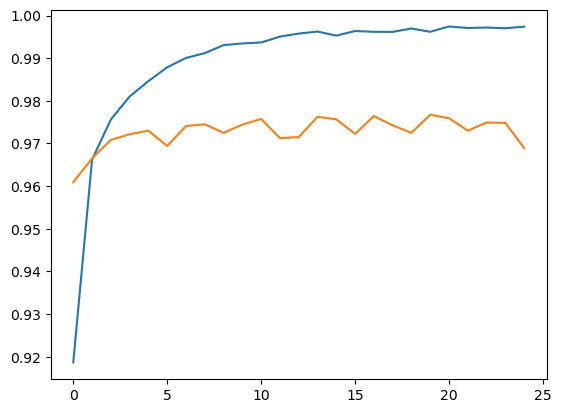

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

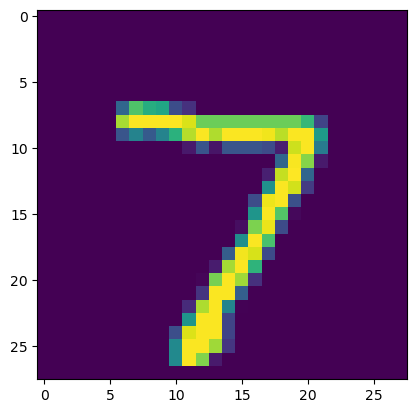

In [18]:
plt.imshow(X_test[0])

In [20]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([7], dtype=int64)